In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../data/2016-11-22-reimbursements.xz',
                      dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str},
                      low_memory=False)

In [3]:
dataset = dataset[dataset['year']==2016]

In [4]:
dataset.head()

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
987711,2016,1001,5893769,NaN,175.06,5308,DILCEU SPERAFICO,73768,444,2015.0,...,2016-01-18T00:00:00,175.06,0.0,175.06,1,0,NaN,NaN,1257503,NaN
987712,2016,1001,5893794,NaN,116.11,5308,DILCEU SPERAFICO,73768,444,2015.0,...,2016-01-01T00:00:00,116.11,0.0,116.11,1,0,NaN,NaN,1257503,NaN
987713,2016,1001,5893796,NaN,662.27,5365,DILCEU SPERAFICO,73768,444,2015.0,...,2016-01-01T00:00:00,662.27,0.0,662.27,1,0,NaN,NaN,1267793,NaN
987714,2016,1001,5899165,NaN,169.06,5318,DILCEU SPERAFICO,73768,444,2015.0,...,2016-01-07T00:00:00,169.06,0.0,169.06,1,0,NaN,NaN,1258959,NaN
987715,2016,1001,5899171,NaN,143.15,5318,DILCEU SPERAFICO,73768,444,2015.0,...,2016-01-07T00:00:00,143.15,0.0,143.15,1,0,NaN,NaN,1258959,NaN


# Find spends: congress person per month

/home/ana/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


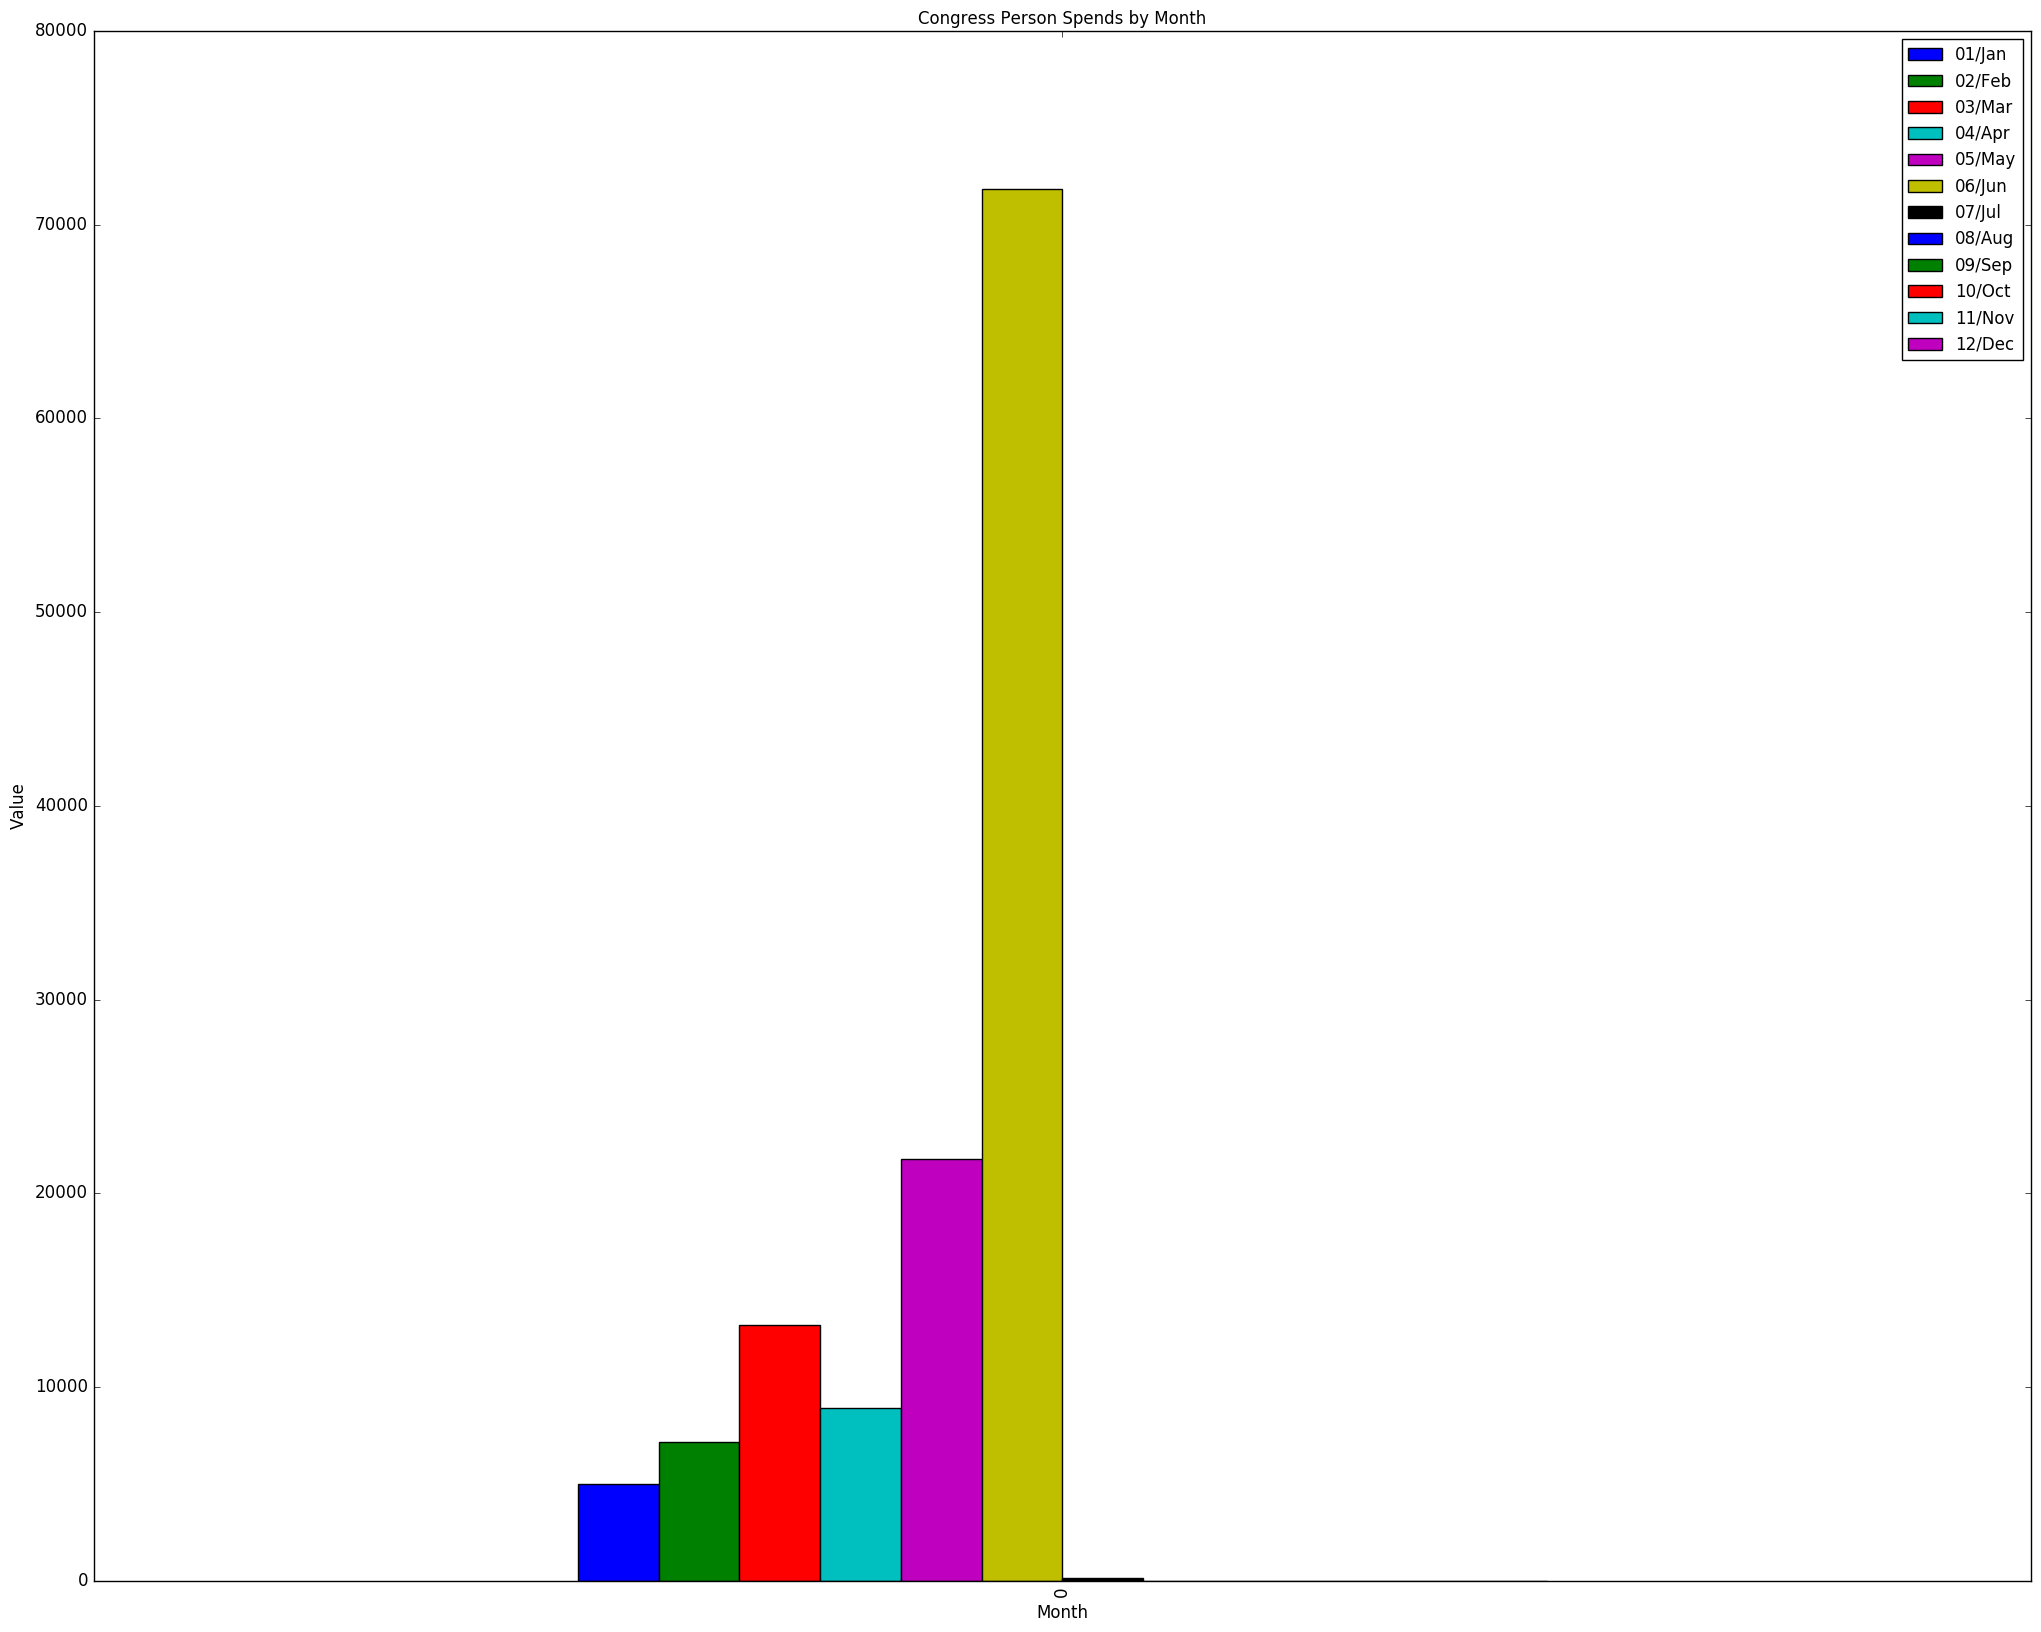

,01/Jan,02/Feb,03/Mar,04/Apr,05/May,06/Jun,07/Jul,08/Aug,09/Sep,10/Oct,11/Nov,12/Dec,name
0,4981.93,7147.45,13200.81,8899.51,21769.52,71856.62,125.53,0,0,0,0,0,[JAIR BOLSONARO]


In [5]:
def find_spends_by_month(df, applicant_id):
    '''
    Return a dataframe with the sum of values of spends by month
    of the congress person of "applicant_id"
    Parameters:
        - df: pandas dataframe to be sliced
        - applicant_id: unique id of the congress person
        
    Ex: find_spends_by_month(df, 731)
    Result dataframe contains:
        - 1/Jan sum
        - 2/Feb sum
        - 3/Mar sum
        - 4/Apr sum
        - 5/May sum
        - 6/Jun sum
        - 7/Jul sum
        - 8/Aug sum
        - 9/Sep sum
        - 10/Oct sum
        - 11/Nov sum
        - 12/Dec sum
        - name
    '''
    months={1:"Jan",
            2:"Feb",
            3:"Mar",
            4:"Apr",
            5:"May",
            6:"Jun",
            7:"Jul",
            8:"Aug",
            9:"Sep",
            10:"Oct",
            11:"Nov",
            12:"Dec"}
    df_applicant = df[df.applicant_id == applicant_id]
    result = {
        "name":df_applicant["congressperson_name"].unique()
    }
       
    for m in months.keys():
        data = df_applicant[df.month == m]
        result["{:>02}".format(m) + "/" + months[m]] = data.total_net_value.sum()
    
    df_final = pd.DataFrame([result])
     
    ax = df_final.plot(kind='bar', title ="Congress Person Spends by Month", figsize=(25, 20), legend=True, fontsize=12)
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    plt.show()
    
    return pd.DataFrame([result])

find_spends_by_month(dataset, 731)

# Find spends: Congress Person per Subquotas

/home/ana/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


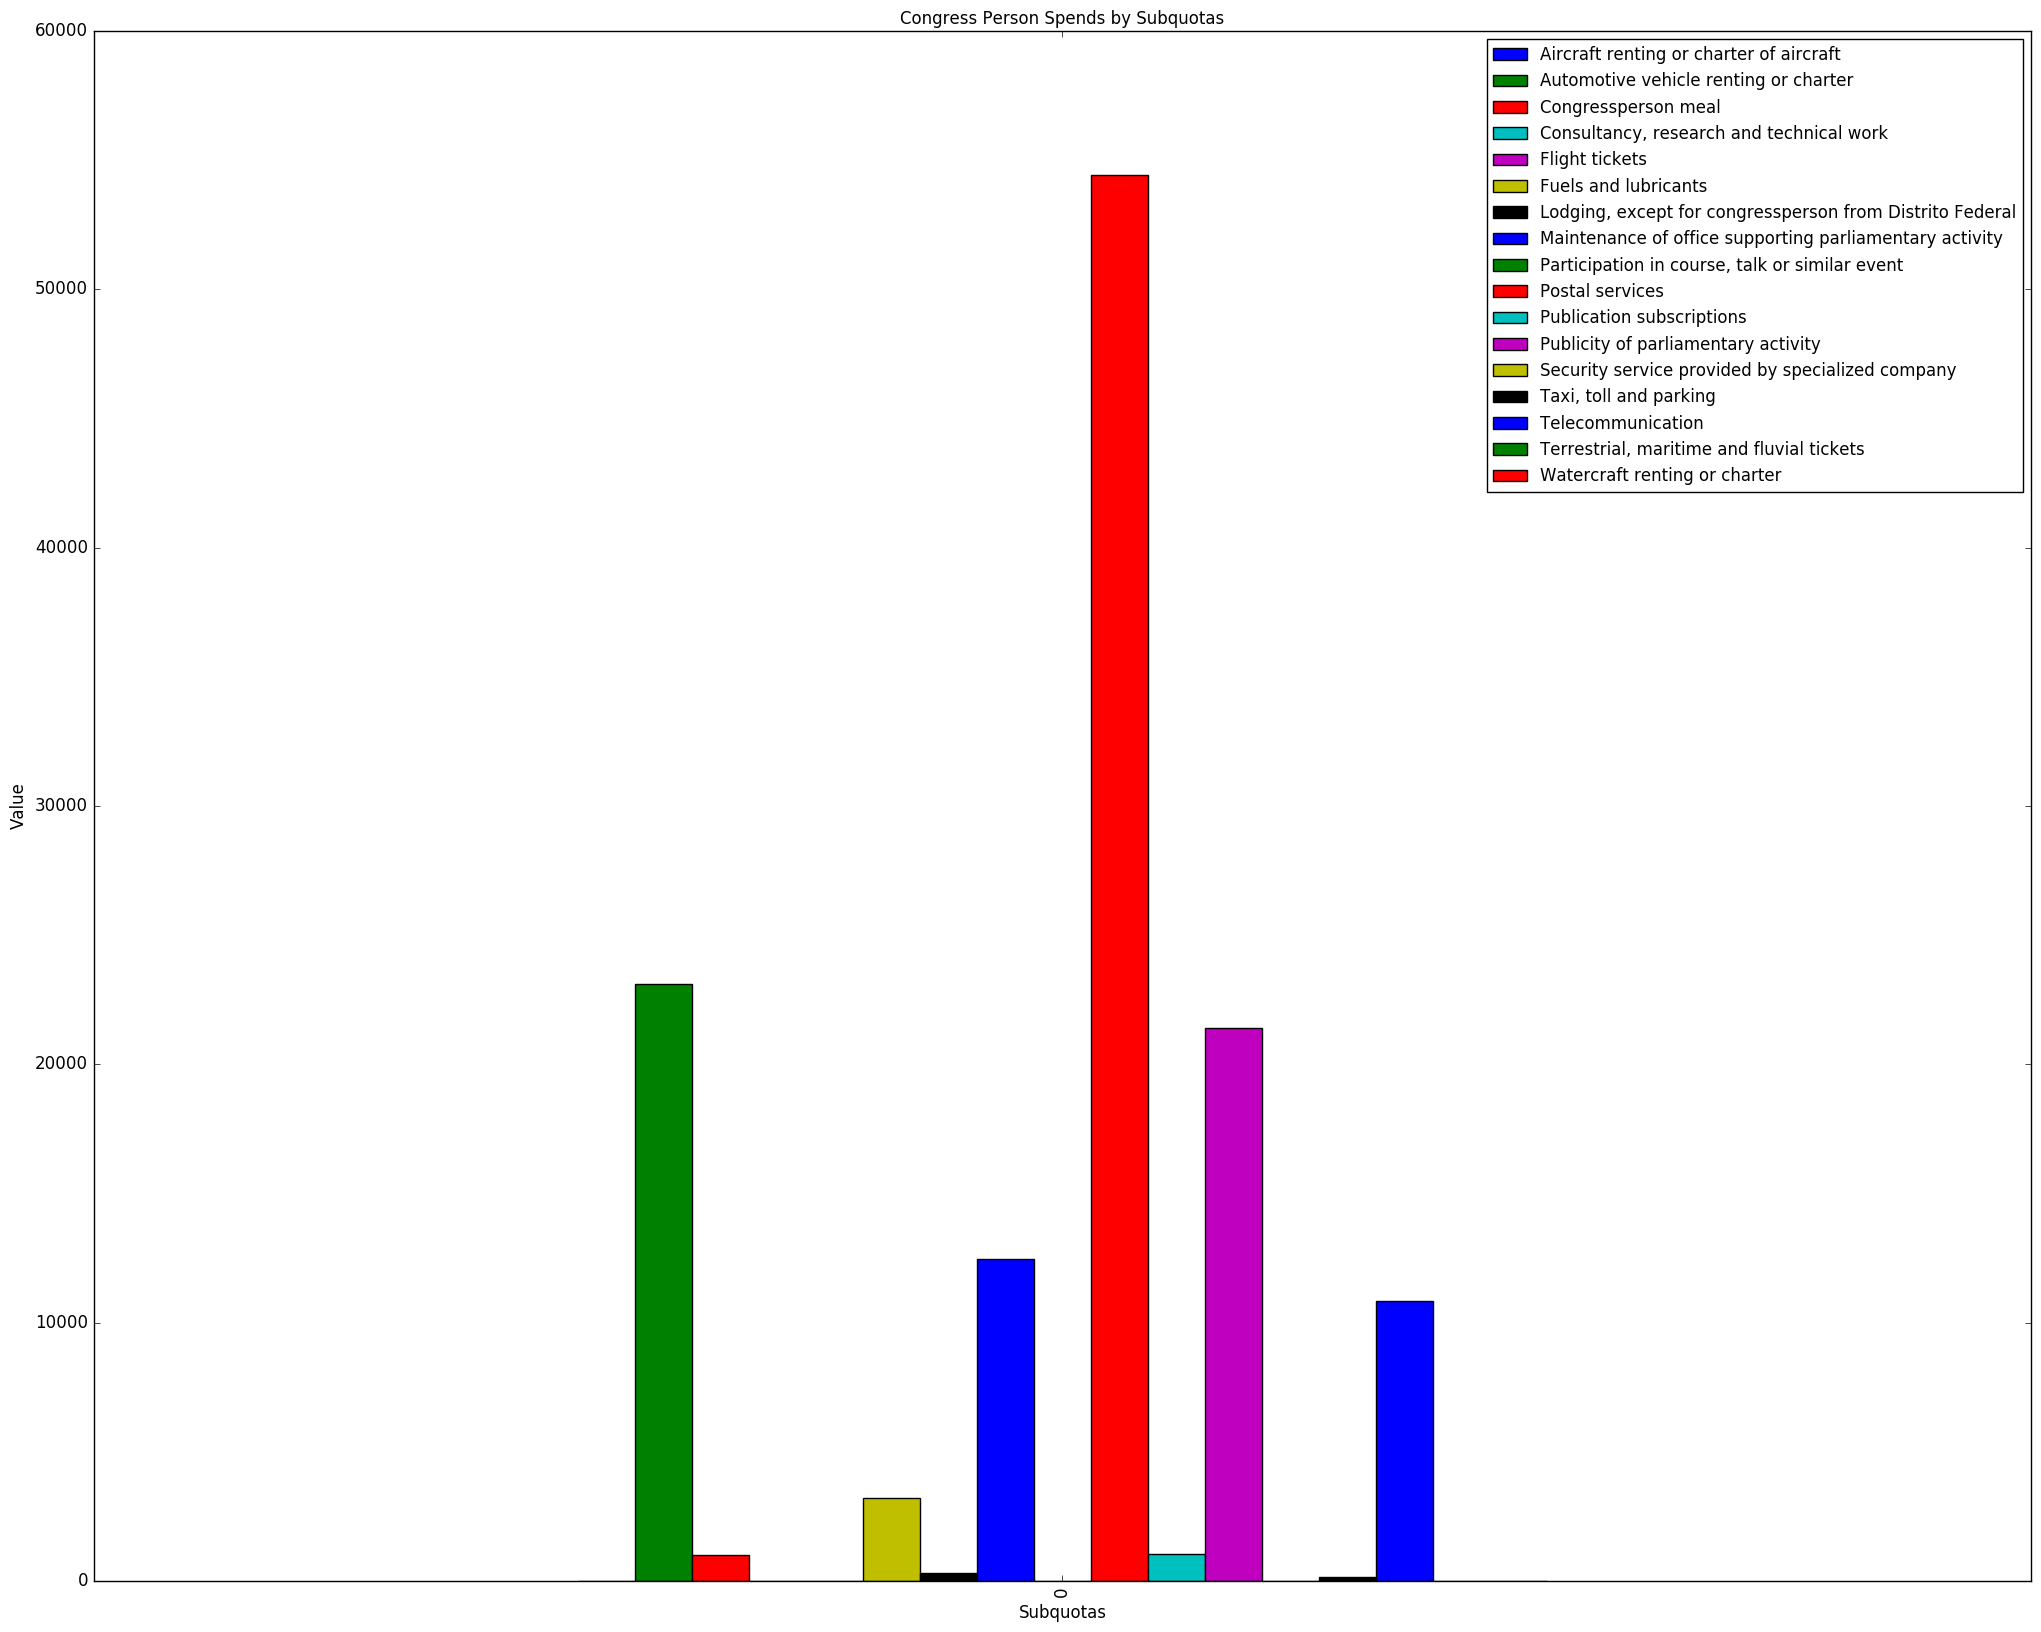

,Aircraft renting or charter of aircraft,Automotive vehicle renting or charter,Congressperson meal,"Consultancy, research and technical work",Flight tickets,Fuels and lubricants,"Lodging, except for congressperson from Distrito Federal",Maintenance of office supporting parliamentary activity,"Participation in course, talk or similar event",Postal services,Publication subscriptions,Publicity of parliamentary activity,Security service provided by specialized company,"Taxi, toll and parking",Telecommunication,"Terrestrial, maritime and fluvial tickets",Watercraft renting or charter,name
0,0,23100.0,1012.89,0,0,3223.68,305.0,12469.88,0,54430.69,1056.38,21395.67,0,150.0,10837.18,0,0,[JAIR BOLSONARO]


In [6]:
def find_spends_by_subquota(df, applicant_id):
    '''
    Return a dataframe with the sum of values of spends by subquotas
    of the congress person of "applicant_id"
    Parameters:
        - df: pandas dataframe to be sliced
        - applicant_id: unique id of the congress person
    '''
    df_applicant = df[df.applicant_id == applicant_id]
    result = {
        "name":df_applicant["congressperson_name"].unique()
    }
    
    for c in df["subquota_description"].unique():
        data = df_applicant[df.subquota_description == c]
        result[c] = data.total_net_value.sum()
    
    df_final = pd.DataFrame([result])
    ax = df_final.plot(kind='bar', title ="Congress Person Spends by Subquotas", figsize=(25, 20), legend=True, fontsize=12)
    ax.set_xlabel("Subquotas", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    plt.show()
    return pd.DataFrame([result])

find_spends_by_subquota(dataset, 731)

/home/ana/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


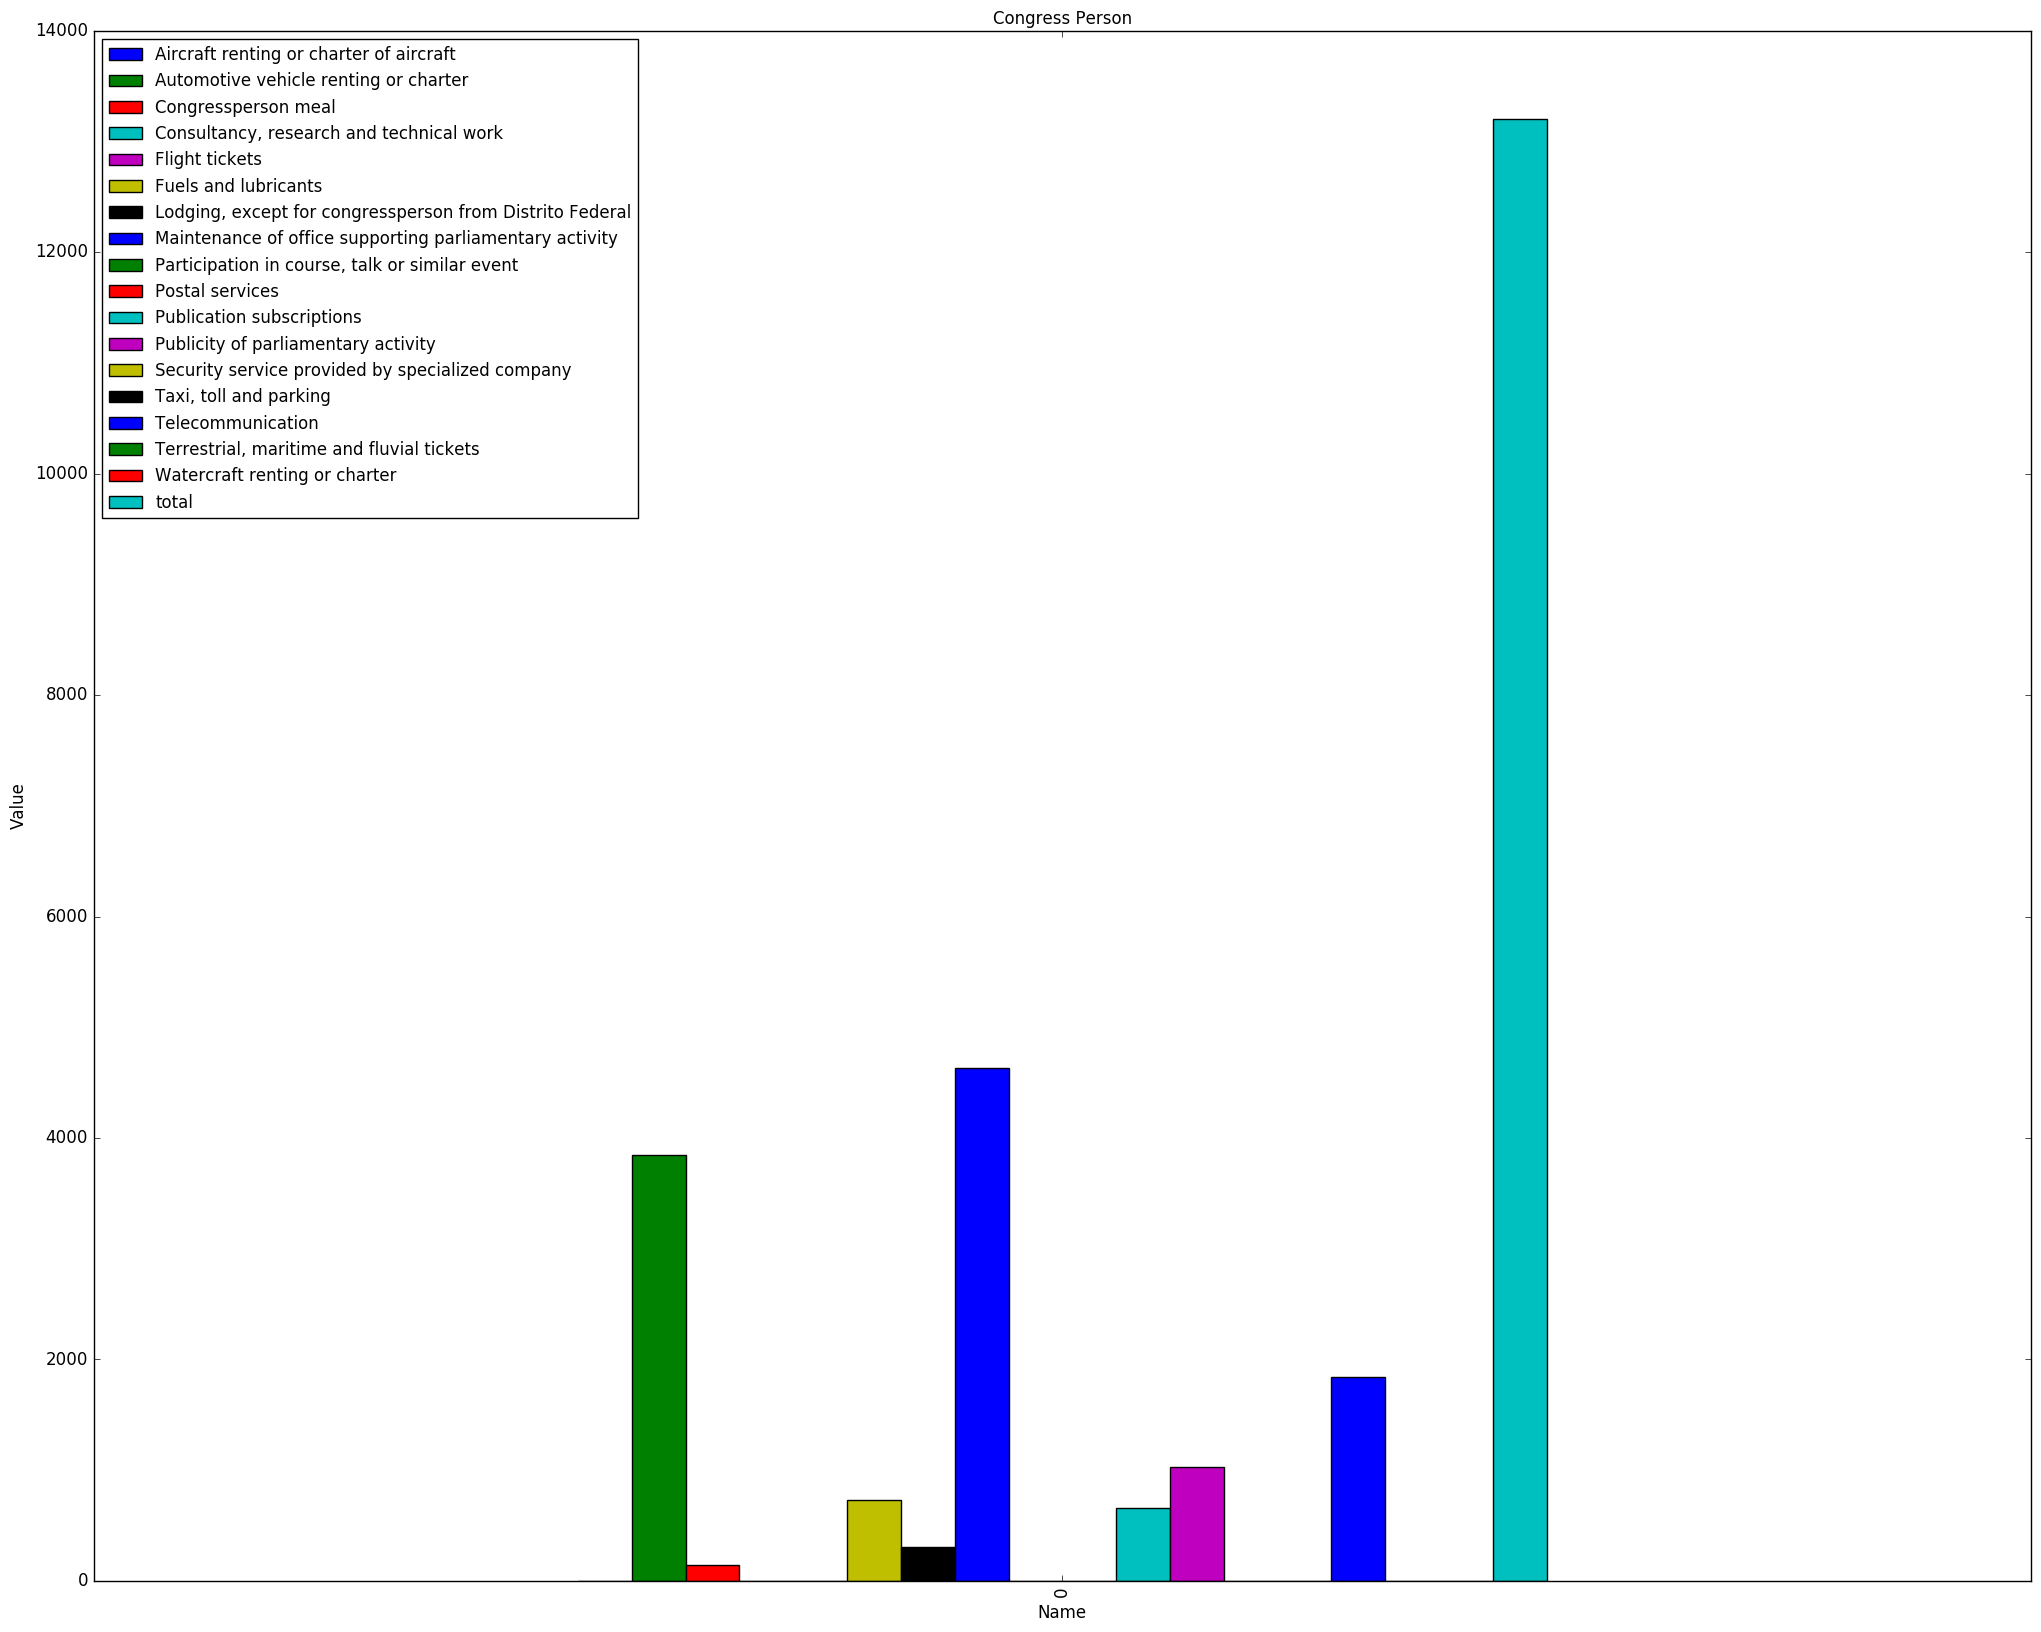

,Aircraft renting or charter of aircraft,Automotive vehicle renting or charter,Congressperson meal,"Consultancy, research and technical work",Flight tickets,Fuels and lubricants,"Lodging, except for congressperson from Distrito Federal",Maintenance of office supporting parliamentary activity,"Participation in course, talk or similar event",Postal services,Publication subscriptions,Publicity of parliamentary activity,Security service provided by specialized company,"Taxi, toll and parking",Telecommunication,"Terrestrial, maritime and fluvial tickets",Watercraft renting or charter,name,total
0,0,3850.0,147.51,0,0,729.32,305.0,4635.65,0,0,660.34,1031.89,0,0,1841.1,0,0,[JAIR BOLSONARO],13200.81


In [7]:
 def find_spends_by_subquota(df, applicant_id, month=None):
    '''
    Return a dataframe with the sum of values of spends by subquotas
    of the congress person of "applicant_id" and month "month"
    Parameters:
        - df: pandas dataframe to be sliced
        - applicant_id: unique id of the congress person
    '''
    df_applicant = df[df.applicant_id == applicant_id]
    
    result = {
        "name":df_applicant["congressperson_name"].unique(),
        "total": 0
        
    }
    if month != None:
        df_applicant = df_applicant[df_applicant.month==month]


    for c in df["subquota_description"].unique():
        data = df_applicant[df.subquota_description == c]
        result[c] = data.total_net_value.sum()
        result["total"] += result[c]
    
    df_final = pd.DataFrame([result])
    ax = df_final.plot(kind='bar', title ="Congress Person", figsize=(25, 20), legend=True, fontsize=12)
    ax.set_xlabel("Name", fontsize=12)
    ax.set_ylabel("Value", fontsize=12)
    plt.show()
    return pd.DataFrame([result])

find_spends_by_subquota(dataset, 731, 3)

# Find spends: all congress people 

In [8]:
def find_sum_of_values(df, aggregator, property):
    '''
    Return a dataframe with the statistics of values from "property"
    aggregated by unique values from the column "aggregator"
    Parameters:
        - df: pandas dataframe to be sliced
        - aggregator: dataframe column that will be
                      filtered by unique values
        - property: dataframe column containing values to be summed
    Ex: find_sum_of_values(data, 'congressperson_name', 'net_value')
    Result dataframe contains (for each aggregator unit):
        - property sum
        - property mean value
        - property max value
        - property mean value
        - number of occurences in total
    '''

    total_label = '{}_total'.format(property)
    max_label = '{}_max'.format(property)
    mean_label = '{}_mean'.format(property)
    min_label = '{}_min'.format(property)

    result = {
        'occurences': [],
        aggregator: df[aggregator].unique(),
        max_label: [],
        mean_label: [],
        min_label: [],
        total_label: [],

    }

    for item in result[aggregator]:
        if isinstance(df[aggregator].iloc[0], str):
            item = str(item)
        values = df[df[aggregator] == item]
        property_total = int(values[property].sum())
        occurences = int(values[property].count())

        result[total_label].append(property_total)
        result['occurences'].append(occurences)
        result[mean_label].append(property_total/occurences)
        result[max_label].append(np.max(values[property]))
        result[min_label].append(np.min(values[property]))

    return pd.DataFrame(result).sort_values(by=aggregator)

df = find_sum_of_values(dataset, "congressperson_name", "total_net_value")
df[:10]

,congressperson_name,occurences,total_net_value_max,total_net_value_mean,total_net_value_min,total_net_value_total
491,ABEL MESQUITA JR.,46,30000.0,5146.630435,31.37,236745
435,ADAIL CARNEIRO,75,12000.0,1270.333333,7.00,95275
344,ADALBERTO CAVALCANTI,90,12750.0,2473.022222,25.15,222572
328,ADELMO CARNEIRO LEÃO,435,9000.0,402.641379,10.00,175149
346,ADELSON BARRETO,33,12000.0,3126.545455,49.81,103176
103,ADEMIR CAMILO,307,18590.0,778.983713,1.80,239148
445,ADILTON SACHETTI,184,10000.0,690.005435,12.00,126961
107,AELTON FREITAS,281,10000.0,728.017794,12.00,204573
281,AFONSO FLORENCE,332,22600.0,605.000000,2.80,200860
105,AFONSO HAMM,314,8500.0,323.990446,5.20,101733


# Finding congress people that spent more than 500 thousand per year

In [9]:
df = df[df.total_net_value_total > 500000]
df

,congressperson_name,occurences,total_net_value_max,total_net_value_mean,total_net_value_min,total_net_value_total
338,FRANCISCO CHAPADINHA,84,97200.05,5982.047619,13.0,502492


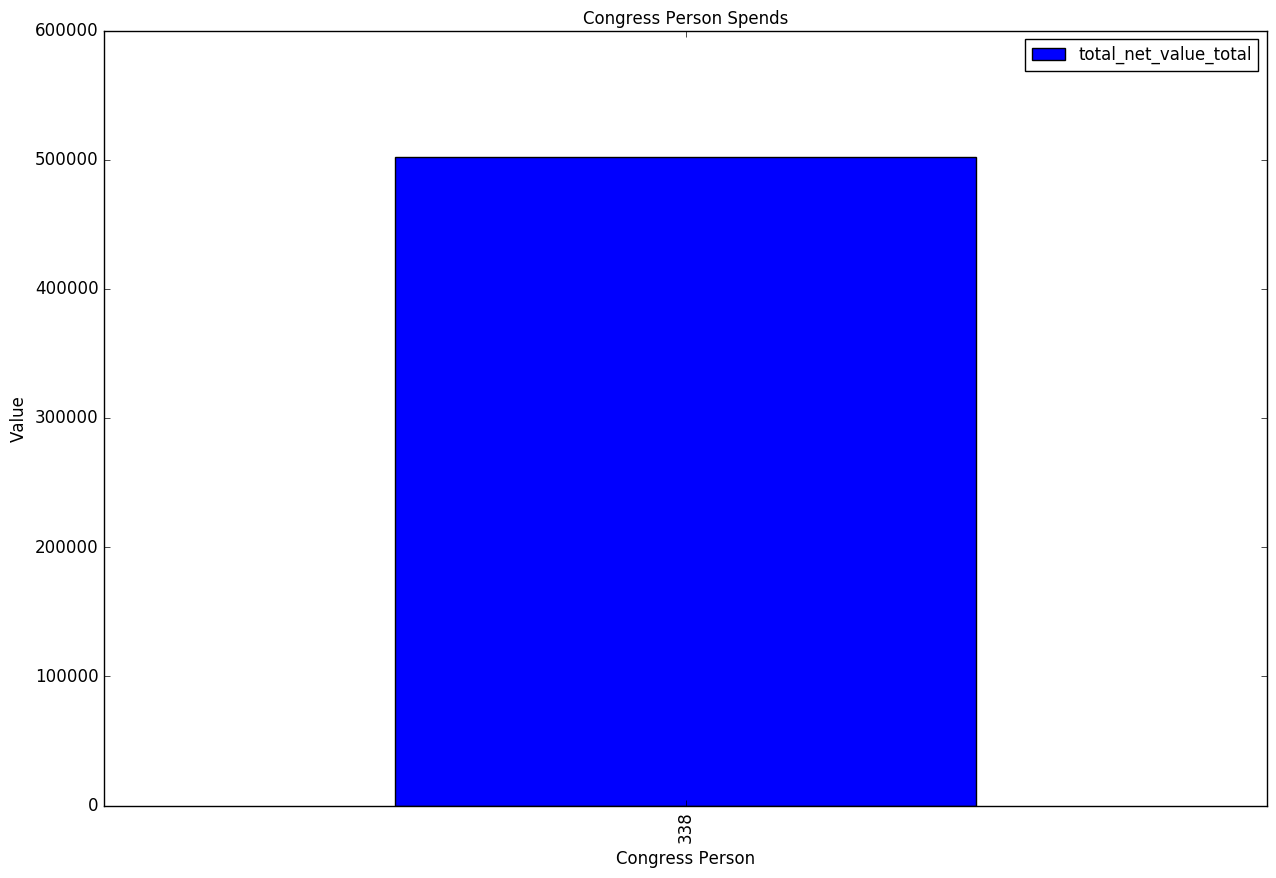

In [10]:
ax = df[["total_net_value_total"]].plot(kind='bar', title ="Congress Person Spends", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Congress Person", fontsize=12)
ax.set_ylabel("Value", fontsize=12)
plt.show()